<a href="https://colab.research.google.com/github/Mercymerine/Pandas-Analysis/blob/main/food_carbon_footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
food = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv')
food

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [ ]:
food['country'].nunique()

130

In [ ]:
food['food_category'].nunique()

11

In [ ]:
food['food_category'].value_counts()

food_category
Pork                        130
Poultry                     130
Beef                        130
Lamb & Goat                 130
Fish                        130
Eggs                        130
Milk - inc. cheese          130
Wheat and Wheat Products    130
Rice                        130
Soybeans                    130
Nuts inc. Peanut Butter     130
Name: count, dtype: int64

* General distribution of food categories?
* Which food is eaten the most?
* Which food has the highest carbondioxide emmission?
* Which country consumes the most flesh and plant?
*   What is there co2 emmision?
*   What is there co2 emmision?





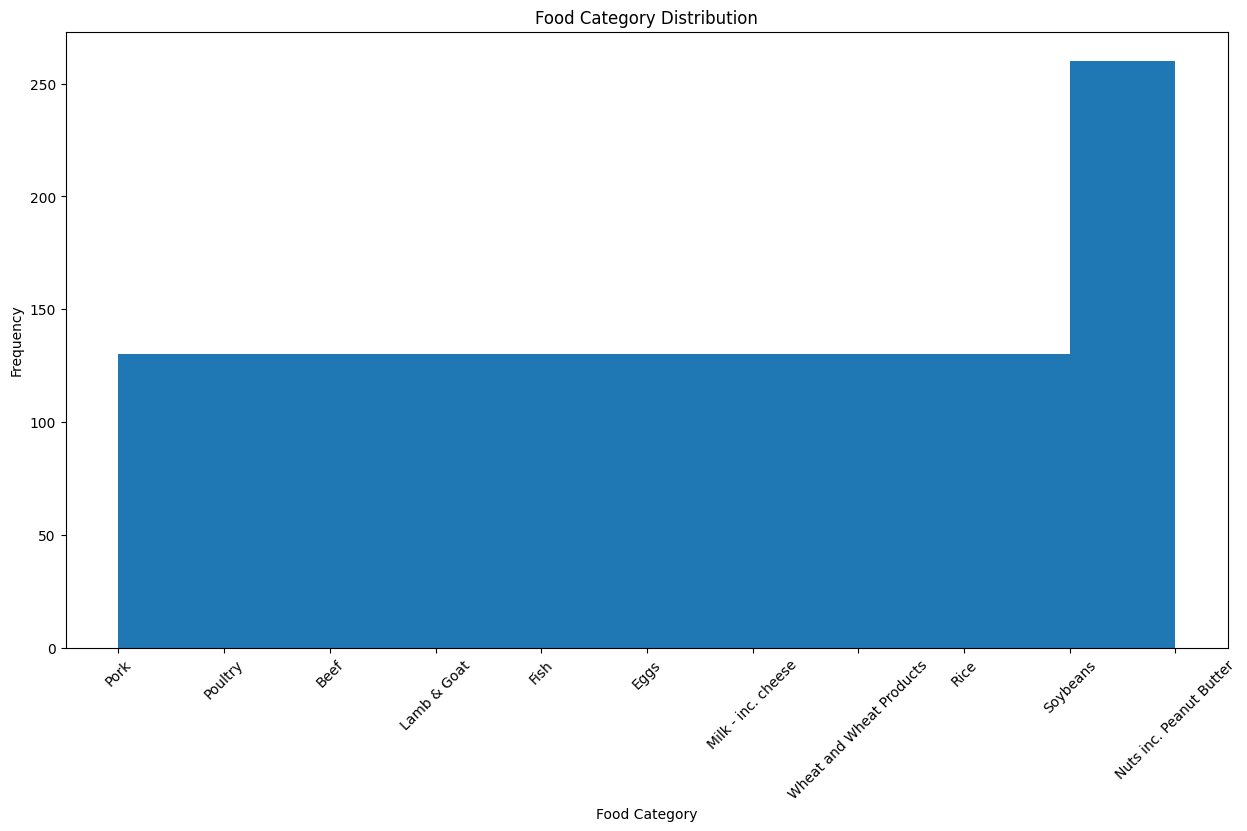

In [ ]:

plt.figure(figsize=(15, 8))
plt.hist(food['food_category'])


plt.xlabel('Food Category')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Food Category Distribution')

plt.show()

In [ ]:
food.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


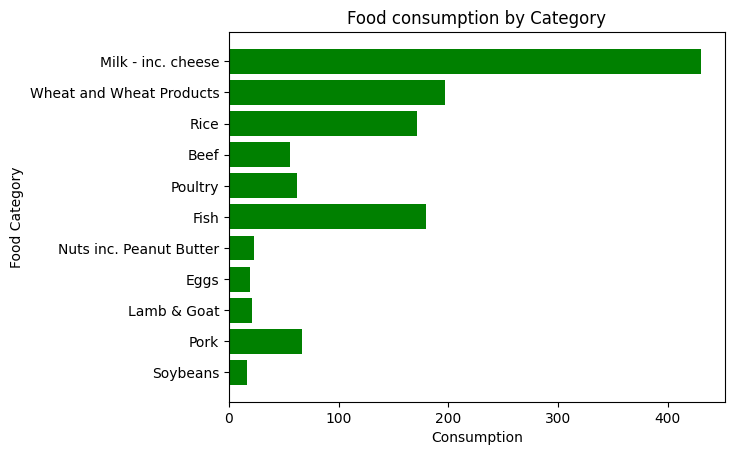

In [ ]:
sorted_food = food.sort_values(by='consumption', ascending=True)

plt.barh(sorted_food['food_category'], sorted_food['consumption'], color='green')

plt.xlabel('Consumption')
plt.ylabel('Food Category')
plt.title('Food consumption by Category')

plt.show()

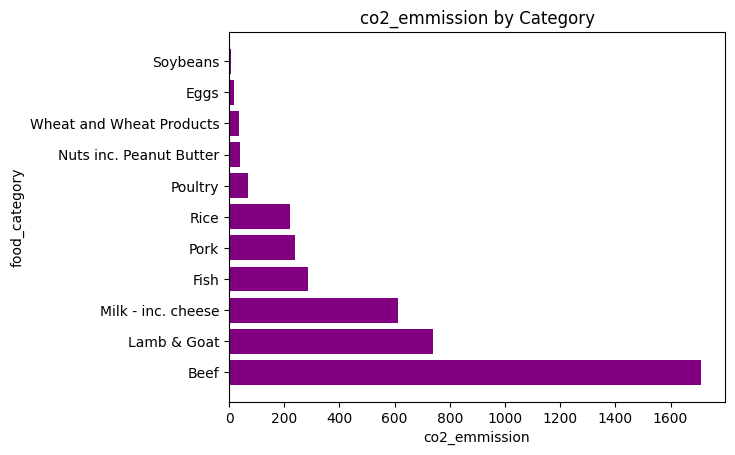

In [ ]:
sorted_food = food.sort_values(by='co2_emmission', ascending=False)

plt.barh(sorted_food['food_category'], sorted_food['co2_emmission'], color='purple')

plt.xlabel('co2_emmission')
plt.ylabel('food_category')
plt.title('co2_emmission by Category')
plt.show()

* The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.
*Highlight the marked difference between consumption and emissions in certain food product of your choice
*The food consumption of animal and non-animal products and the impact on carbon footprint.
*Use this image
Beef's contribution to CO2 emissions (kg/person/year) - Map this.





In [ ]:
food.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

In [ ]:
countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']

country_emmission = food[food['country'].isin(countries)]
print(country_emmission)
country_emmission.describe()

       country             food_category  consumption  co2_emmission
902      Kenya                      Pork         0.29           1.03
903      Kenya                   Poultry         0.47           0.50
904      Kenya                      Beef         9.54         294.38
905      Kenya               Lamb & Goat         1.86          65.14
906      Kenya                      Fish         4.27           6.82
907      Kenya                      Eggs         1.84           1.69
908      Kenya        Milk - inc. cheese        94.86         135.12
909      Kenya  Wheat and Wheat Products        34.65           6.61
910      Kenya                      Rice        12.94          16.56
911      Kenya                  Soybeans         0.20           0.09
912      Kenya   Nuts inc. Peanut Butter         1.64           2.90
1089    Uganda                      Pork         3.37          11.93
1090    Uganda                   Poultry         1.51           1.62
1091    Uganda                    

,consumption,co2_emmission
count,55.000000,55.000000
mean,8.511273,29.129636
std,16.038894,55.345732
min,0.010000,0.000000
25%,0.710000,1.030000
50%,1.930000,5.940000
75%,7.965000,35.330000
max,94.860000,294.380000


In [ ]:
food_country = country_emmission.groupby(['food_category'])['co2_emmission'].mean()
sorted_food_country = food_country.sort_values(ascending=False)
sorted_food_country_df=sorted_food_country.reset_index()
print(pd.DataFrame(sorted_food_country_df))

               food_category  co2_emmission
0                       Beef        166.138
1         Milk - inc. cheese         63.754
2                Lamb & Goat         55.262
3                       Rice         12.680
4                       Fish          8.428
5    Nuts inc. Peanut Butter          4.650
6   Wheat and Wheat Products          3.940
7                       Pork          3.370
8                    Poultry          1.250
9                       Eggs          0.718
10                  Soybeans          0.236


In [ ]:
sorted_food_country_df['food_category'].unique()

array(['Beef', 'Milk - inc. cheese', 'Lamb & Goat', 'Rice', 'Fish',
       'Nuts inc. Peanut Butter', 'Wheat and Wheat Products', 'Pork',
       'Poultry', 'Eggs', 'Soybeans'], dtype=object)

In [ ]:
food_properties = ['Rice', 'Nuts inc. Peanut Butter','Wheat and Wheat Products','Soybeans']
is_plant_based = [True, True, True, True]
food_properties_df = pd.DataFrame(food_properties, columns=['food_category'])
food_properties_df['is_plant_based'] = is_plant_based
print(food_properties_df.reset_index())


   index             food_category  is_plant_based
0      0                      Rice            True
1      1   Nuts inc. Peanut Butter            True
2      2  Wheat and Wheat Products            True
3      3                  Soybeans            True


In [ ]:
sorted_food_country_df = sorted_food_country_df.merge(food_properties_df, on='food_category', how='left')
sorted_food_country_df['is_plant_based'].fillna(False, inplace=True)


In [ ]:
#sorted_food_country_df.drop(columns=['is_plant_based_x',	'is_plant_based_y'], inplace= True)

In [ ]:
sorted_food_country_df

,food_category,co2_emmission,is_plant_based
0,Beef,166.138,False
1,Milk - inc. cheese,63.754,False
2,Lamb & Goat,55.262,False
3,Rice,12.680,True
4,Fish,8.428,False
5,Nuts inc. Peanut Butter,4.650,True
6,Wheat and Wheat Products,3.940,True
7,Pork,3.370,False
8,Poultry,1.250,False
9,Eggs,0.718,False


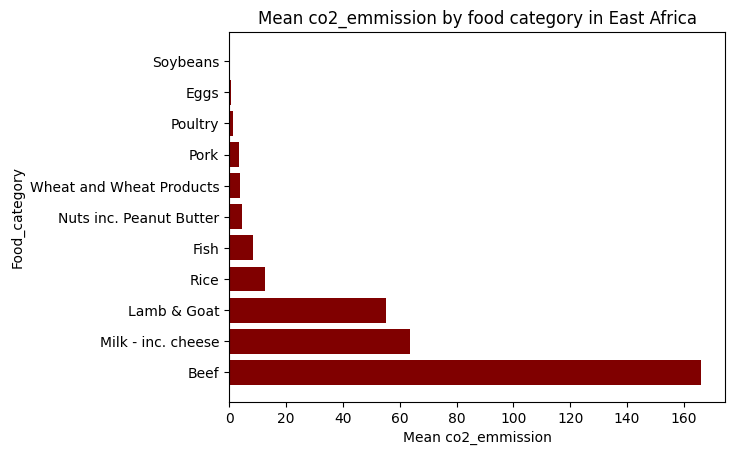

In [ ]:
plt.barh(sorted_food_country_df['food_category'], sorted_food_country_df['co2_emmission'], color='maroon')

plt.xlabel('Mean co2_emmission')
plt.ylabel('Food_category')
plt.title('Mean co2_emmission by food category in East Africa')
plt.show()

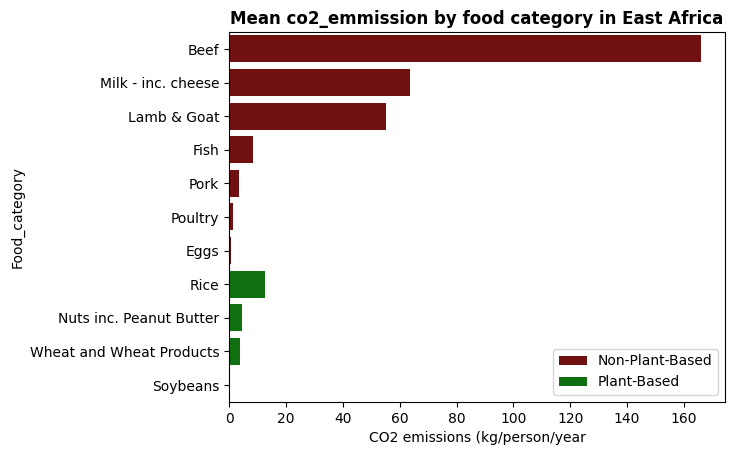

In [ ]:

sns.barplot(x='co2_emmission', y='food_category', data = sorted_food_country_df[~sorted_food_country_df['is_plant_based']], color='maroon', label='Non-Plant-Based')
sns.barplot(x='co2_emmission', y ='food_category', data = sorted_food_country_df[sorted_food_country_df['is_plant_based']], color='green', label='Plant-Based')
plt.legend()
plt.xlabel('CO2 emissions (kg/person/year')
plt.ylabel('Food_category')
plt.title('Mean co2_emmission by food category in East Africa', fontweight='bold')
plt.show()


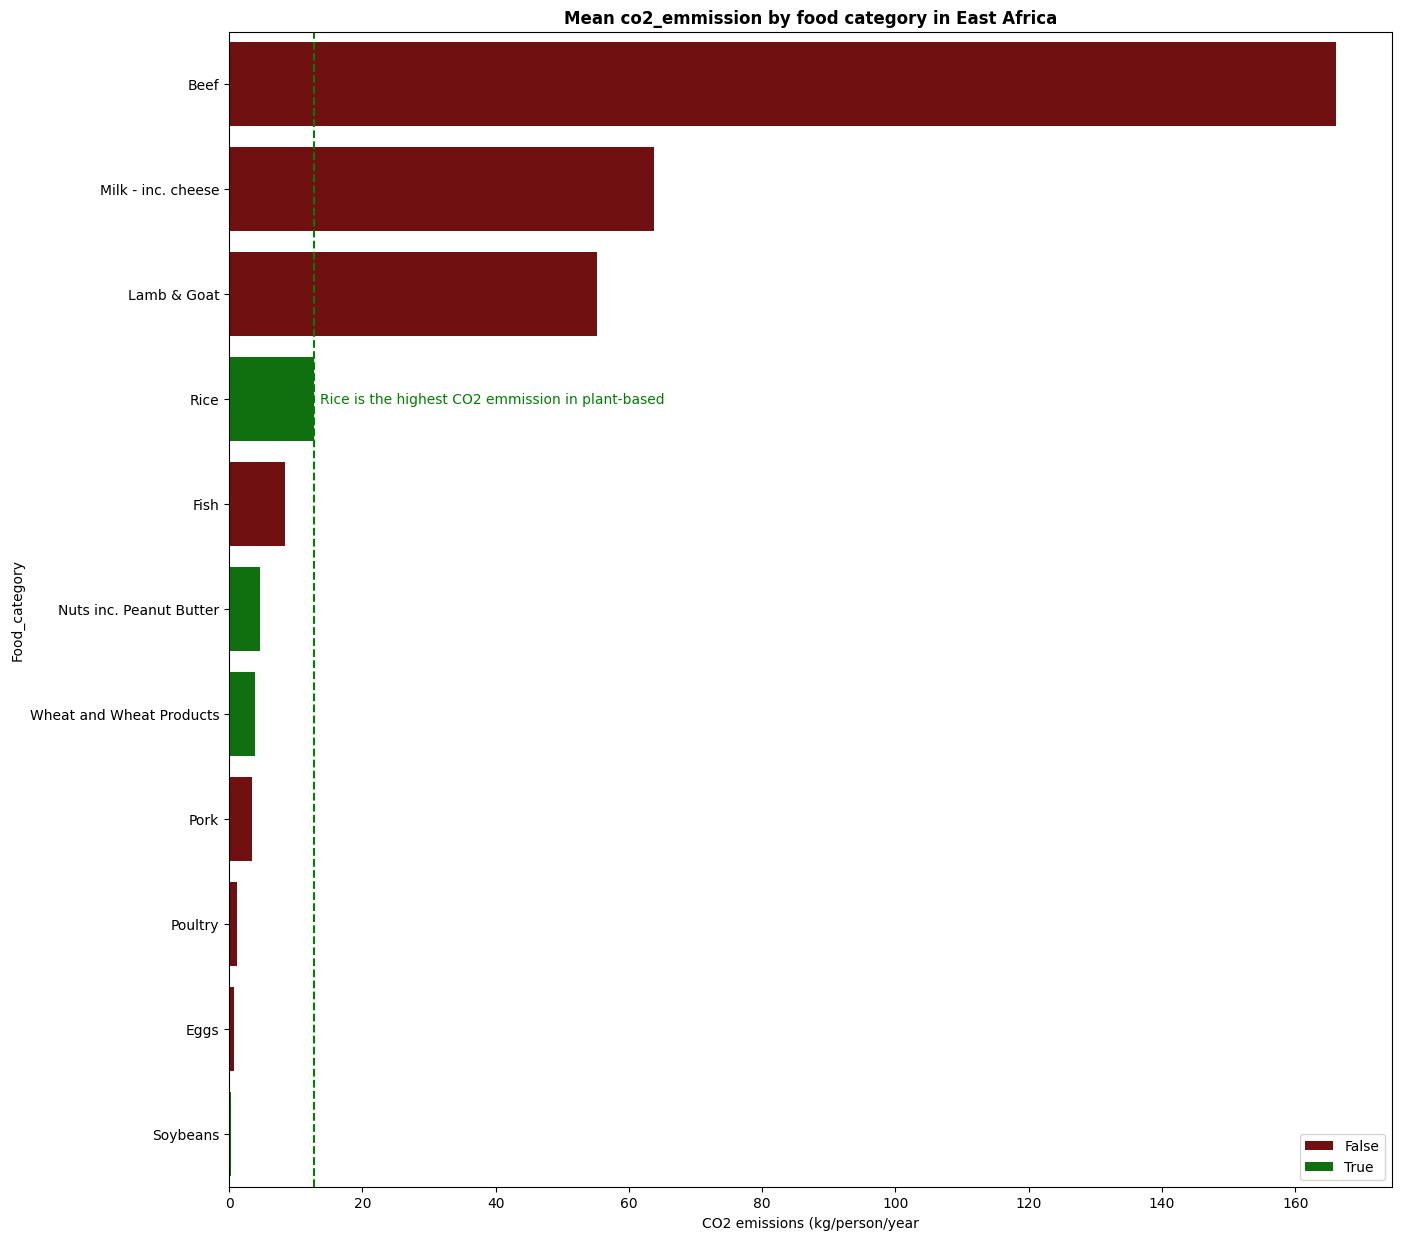

In [ ]:
plt.figure(figsize = (15, 15))
rice_co2_emmission = sorted_food_country_df[sorted_food_country_df['food_category']=='Rice']['co2_emmission'].values[0]
sns.barplot(x='co2_emmission', y='food_category', hue='is_plant_based', data = sorted_food_country_df, palette={True: 'green', False:'maroon'})
plt.axvline(x=rice_co2_emmission, color='green', linestyle='--')
plt.text(rice_co2_emmission + 1, sorted_food_country_df['food_category'].tolist().index('Rice'), 'Rice is the highest CO2 emmission in plant-based', color='green', va='center')
plt.legend()
plt.xlabel('CO2 emissions (kg/person/year')
plt.ylabel('Food_category')
plt.title('Mean co2_emmission by food category in East Africa', fontweight='bold')
plt.show()


In [ ]:
foodsss = sorted_food_country_df[sorted_food_country_df['food_category']=='Rice']['co2_emmission'].values[0]
print(foodsss)

12.680000000000001


Highlight the marked difference between consumption and emissions in certain food product of your choice

In [ ]:
food.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


The df.melt() function in Pandas is used to unpivot a DataFrame from wide format to long format. It’s particularly useful when you want to transform your data so that one or more columns become identifier variables (id_vars), while all other columns (measured variables) are “unpivoted” to the row axis. The result will have just two non-identifier columns: ‘variable’ and ‘value’.

In [ ]:
data = {'food_category': ['Rice', 'Wheat', 'Maize'],
        'consumption': [100, 150, 120],
        'emissions':[200, 180, 220]}

df = pd.DataFrame(data)

#MElting the dataframe
df_melted = df.melt(id_vars = 'food_category', value_vars=['consumption', 'emissions'], var_name='category', value_name='amount')
print(df_melted)


  food_category     category  amount
0          Rice  consumption     100
1         Wheat  consumption     150
2         Maize  consumption     120
3          Rice    emissions     200
4         Wheat    emissions     180
5         Maize    emissions     220


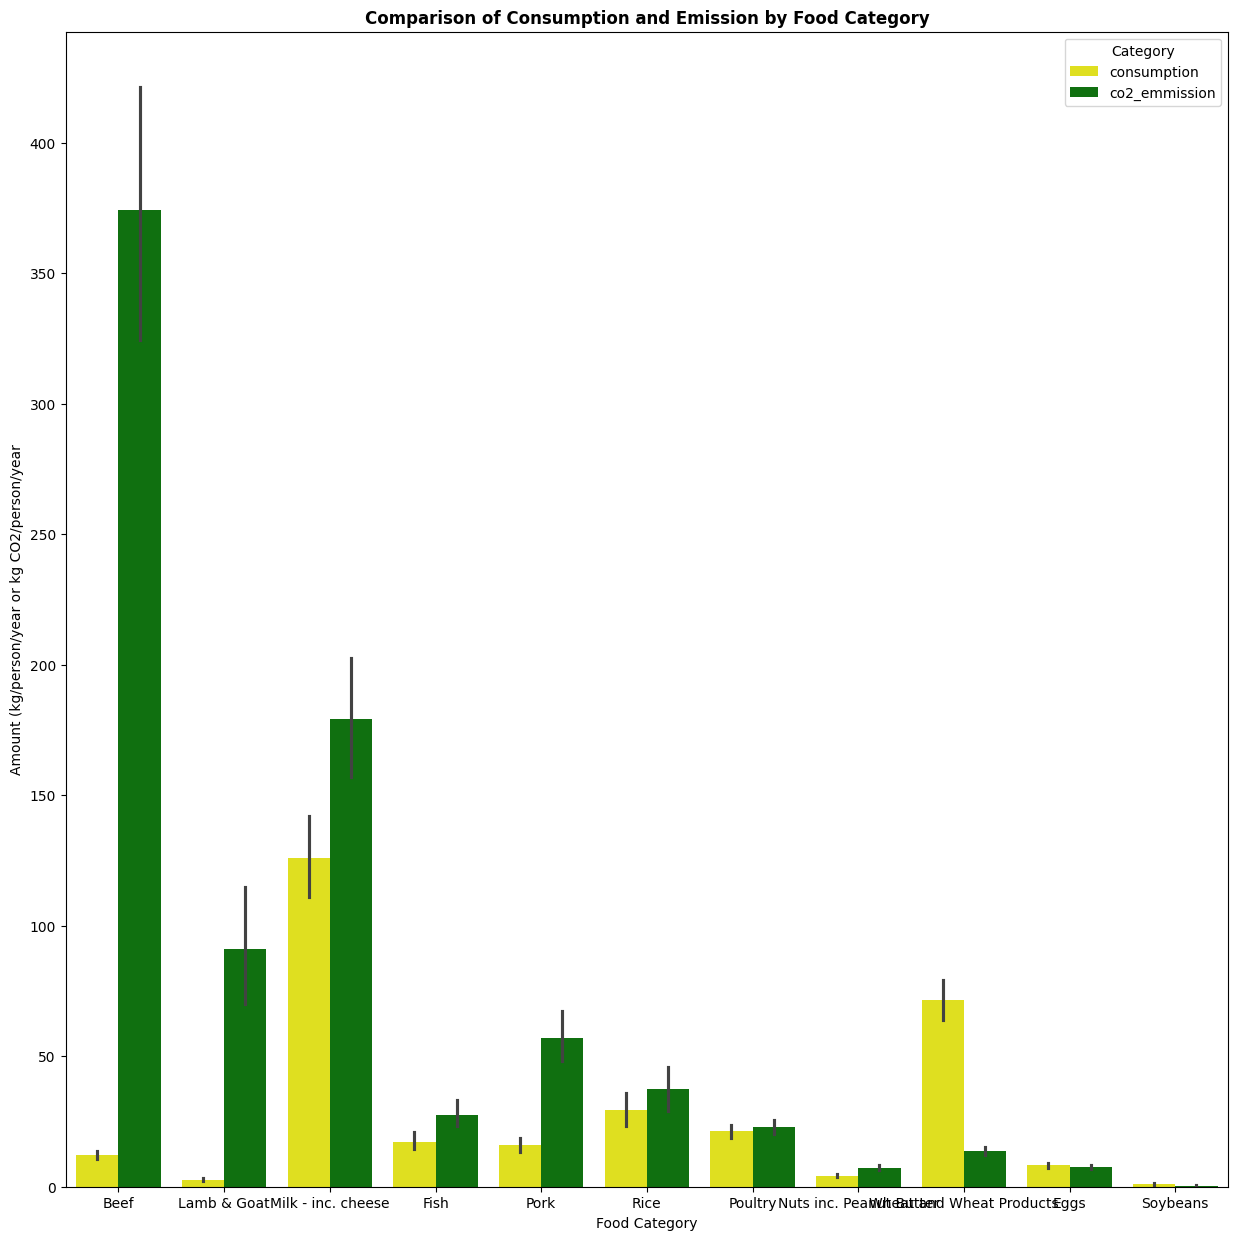

In [ ]:
foods = food.sort_values(by='co2_emmission',ascending=False)
food_melted = foods.melt(id_vars='food_category', value_vars=['consumption', 'co2_emmission'], var_name='category', value_name='amount')

plt.figure(figsize=(15, 15))
sns.barplot(y='amount', x='food_category', hue='category', data=food_melted, palette=['yellow', 'green'])
plt.ylabel('Amount (kg/person/year or kg CO2/person/year')
plt.xlabel('Food Category')
plt.title('Comparison of Consumption and Emission by Food Category', fontweight='bold')
plt.legend(title='Category', loc='upper right')
plt.show()

The food consumption of animal and non-animal products and the impact on carbon footprint. Use this image

In [ ]:
food_properties = ['Rice', 'Nuts inc. Peanut Butter', 'Wheat and Wheat Products', 'Soybeans']
is_plant_based =[True, True, True, True]
food_properties_df = pd.DataFrame(food_properties, columns=['food_category'])
food_properties_df['is_plant_based'] = is_plant_based
print(food_properties_df)

              food_category  is_plant_based
0                      Rice            True
1   Nuts inc. Peanut Butter            True
2  Wheat and Wheat Products            True
3                  Soybeans            True


In [ ]:
food_consumption = food.merge(food_properties_df, on='food_category', how='left')
food_consumption['is_plant_based'].fillna(False, inplace=True)
print(food_consumption)

         country             food_category  consumption  co2_emmission  \
0      Argentina                      Pork        10.51          37.20   
1      Argentina                   Poultry        38.66          41.53   
2      Argentina                      Beef        55.48        1712.00   
3      Argentina               Lamb & Goat         1.56          54.63   
4      Argentina                      Fish         4.36           6.96   
...          ...                       ...          ...            ...   
1425  Bangladesh        Milk - inc. cheese        21.91          31.21   
1426  Bangladesh  Wheat and Wheat Products        17.47           3.33   
1427  Bangladesh                      Rice       171.73         219.76   
1428  Bangladesh                  Soybeans         0.61           0.27   
1429  Bangladesh   Nuts inc. Peanut Butter         0.72           1.27   

      is_plant_based  
0              False  
1              False  
2              False  
3              Fals

In [ ]:
#food_consumption.drop(columns=['is_plant_based_x',	'is_plant_based_y'], inplace= True)

In [ ]:
food_consumption.head()

,country,food_category,consumption,co2_emmission,is_plant_based
0,Argentina,Pork,10.51,37.20,False
1,Argentina,Poultry,38.66,41.53,False
2,Argentina,Beef,55.48,1712.00,False
3,Argentina,Lamb & Goat,1.56,54.63,False
4,Argentina,Fish,4.36,6.96,False


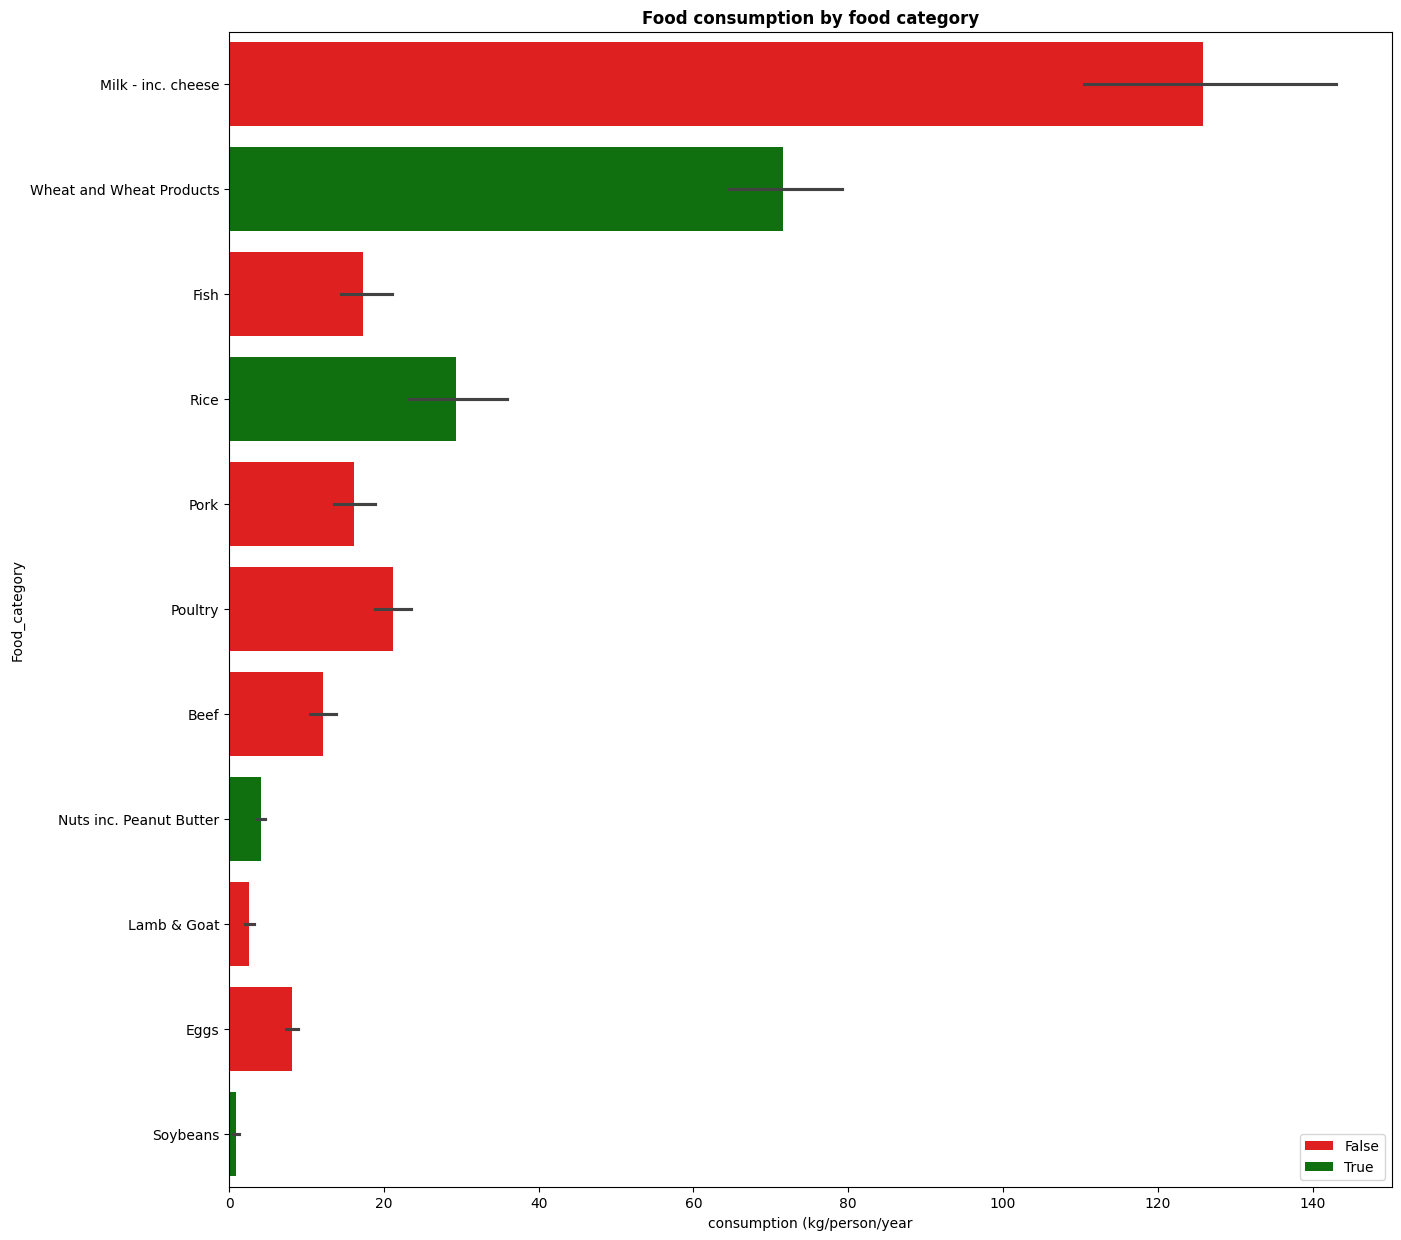

In [ ]:
food_consumption = food_consumption.sort_values(by='consumption',ascending=False)

plt.figure(figsize= (15, 15))
#rice_consumption = food_consumption[food_consumption['consumption']=='Rice']['consumption'].values[0]
sns.barplot(x='consumption', y='food_category', hue='is_plant_based', data= food_consumption, palette={True:'green', False:'red'})
#plt.axvline(x=rice_co2_emmission, color='orange', linestyle='--')
plt.legend()
plt.xlabel('consumption (kg/person/year')
plt.ylabel('Food_category')
plt.title('Food consumption by food category', fontweight='bold')
plt.show()

Beef's contribution to CO2 emissions (kg/person/year) - Map this.

In [ ]:
import geopandas as gdp

In [ ]:
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
world.head()

<ipython-input-32-c228ac64a514>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


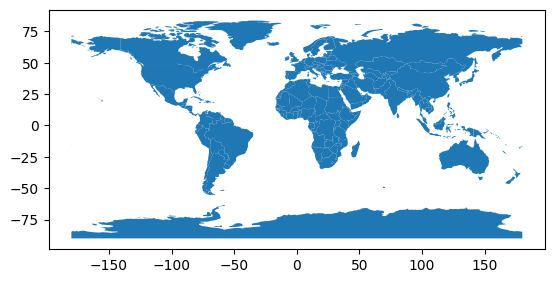

In [ ]:
world.plot()
plt.show()

A box plot and interpretation of the CO2 contributions of food levels. Use this image as inspiration

<ipython-input-54-aa5c47f42cdf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=foods['food_category'], x=foods['co2_emmission'], palette=palette)


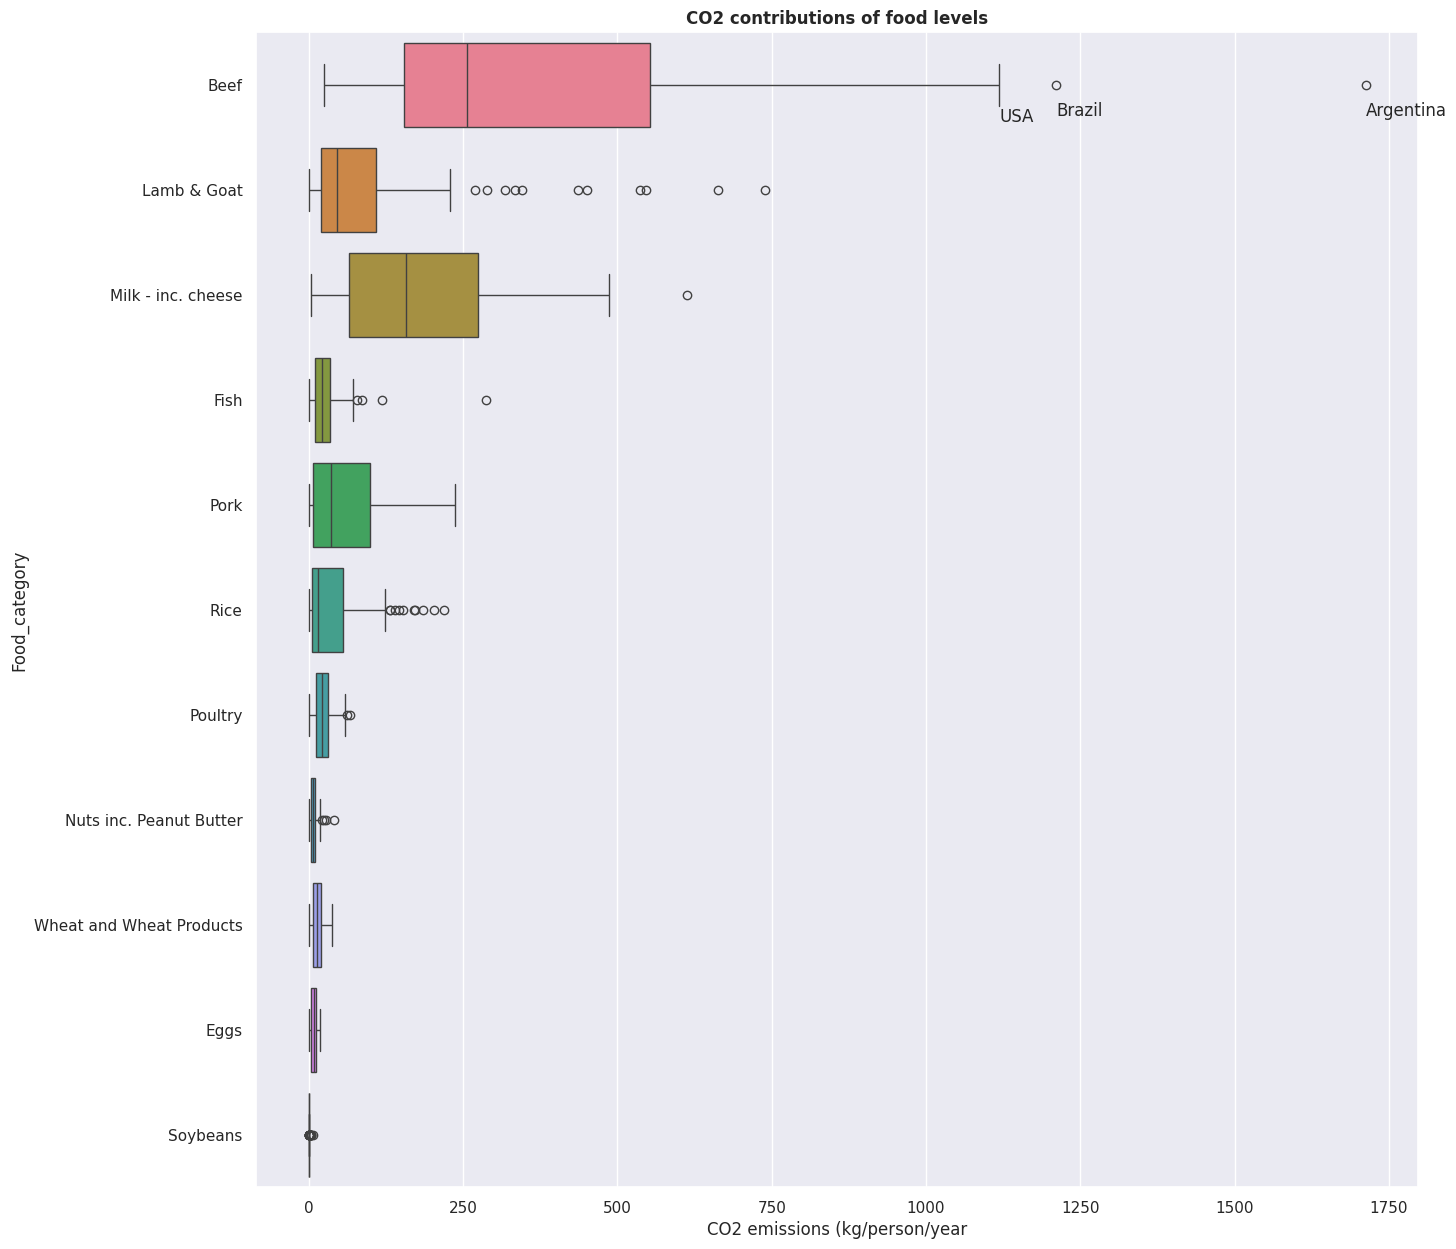

In [ ]:
plt.figure(figsize=(15, 15))
palette = sns.color_palette('husl', len(foods['food_category'].unique()))
foods = food.sort_values(by = 'co2_emmission', ascending= False)
sns.set_theme(style='darkgrid')
sns.boxplot(y=foods['food_category'], x=foods['co2_emmission'], palette=palette)
plt.annotate('Brazil',xy=(1211.17,0.3))
plt.annotate('Argentina',xy=(1712,0.3))
plt.annotate('USA',xy=(1118.29,0.35))
plt.xlabel('CO2 emissions (kg/person/year')
plt.ylabel('Food_category')
plt.title('CO2 contributions of food levels', fontweight='bold')
plt.show()


Top 10 Countries with highest emissions. Choose the appropriate visual type. Get inspiration from this image

In [ ]:
food.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [ ]:
ten.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2 to 233
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        10 non-null     object 
 1   food_category  10 non-null     object 
 2   consumption    10 non-null     float64
 3   co2_emmission  10 non-null     float64
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [ ]:
ten_highest_emmissions = food.sort_values(by = 'co2_emmission', ascending= False)
ten = ten_highest_emmissions.head(10)
print(ten)

              country food_category  consumption  co2_emmission
2           Argentina          Beef        55.48        1712.00
90             Brazil          Beef        39.25        1211.17
57                USA          Beef        36.24        1118.29
13          Australia          Beef        33.86        1044.85
123           Bermuda          Beef        33.15        1022.94
222  French Polynesia          Beef        30.90         953.51
189            Canada          Beef        30.25         933.45
79         Luxembourg          Beef        29.88         922.03
68            Uruguay          Beef        29.10         897.96
233            Israel          Beef        28.78         888.09


In [ ]:

sns.barplot(x='co2_emmission', y='food_category', data = sorted_food_country_df[~sorted_food_country_df['is_plant_based']], color='maroon', label='Non-Plant-Based')
sns.barplot(x='co2_emmission', y ='food_category', data = sorted_food_country_df[sorted_food_country_df['is_plant_based']], color='green', label='Plant-Based')
plt.legend()
plt.xlabel('CO2 emissions (kg/person/year')
plt.ylabel('Food_category')
plt.title('Mean co2_emmission by food category in East Africa', fontweight='bold')
plt.show()


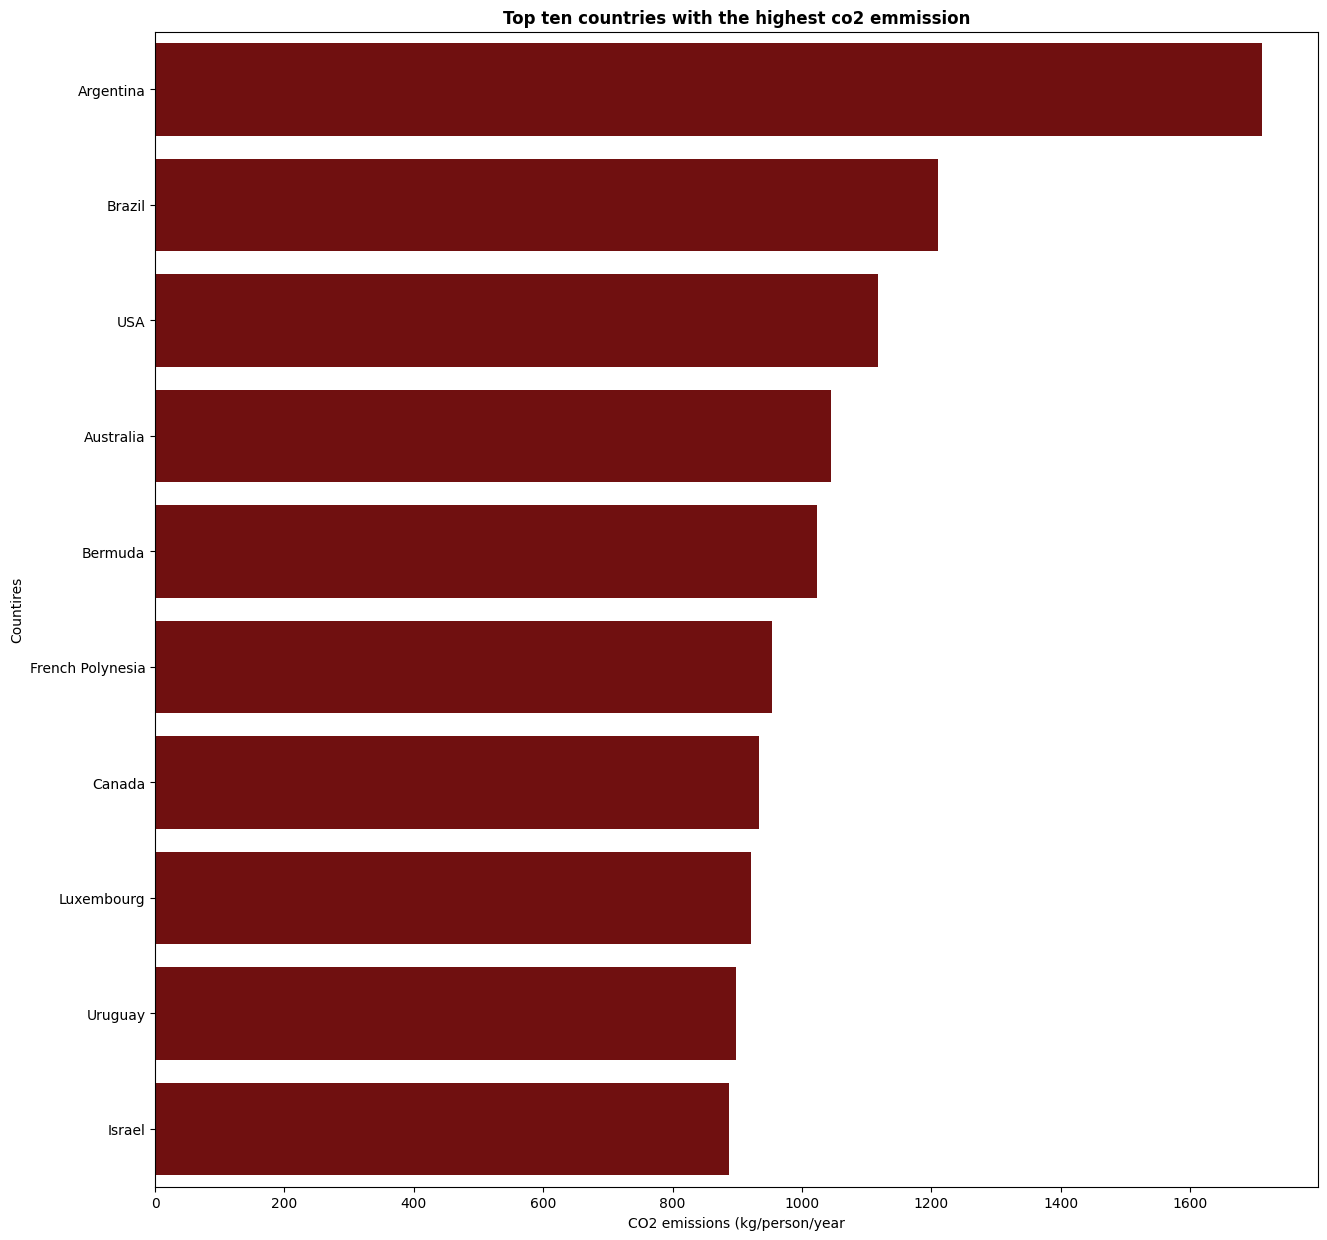

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x='co2_emmission', y = 'country', data=ten, color='maroon')
plt.xlabel('CO2 emissions (kg/person/year')
plt.ylabel('Countires')
plt.title('Top ten countries with the highest co2 emmission', fontweight='bold')
plt.show()
plt.show()